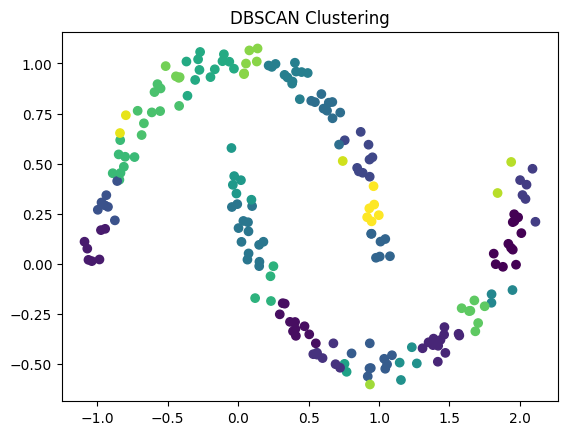

In [1]:
import numpy as np
from collections import deque
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        self.labels_ = -np.ones(X.shape[0], dtype=int)  # Initialize all points as noise
        cluster_id = 0
        for point_idx in range(X.shape[0]):
            if self.labels_[point_idx] != -1:
                continue
            neighbors = self._region_query(X, point_idx)
            if len(neighbors) < self.min_samples:
                self.labels_[point_idx] = -1  # Mark as noise
            else:
                self._expand_cluster(X, point_idx, neighbors, cluster_id)
                cluster_id += 1

    def _region_query(self, X, point_idx):
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        return np.where(distances <= self.eps)[0]

    def _expand_cluster(self, X, point_idx, neighbors, cluster_id):
        self.labels_[point_idx] = cluster_id
        queue = deque(neighbors)
        while queue:
            current_point = queue.popleft()
            if self.labels_[current_point] == -1:
                self.labels_[current_point] = cluster_id  # Change noise to border point

            if self.labels_[current_point] != -1:
                continue
            self.labels_[current_point] = cluster_id
            current_neighbors = self._region_query(X, current_point)
            if len(current_neighbors) >= self.min_samples:
                queue.extend(current_neighbors)

# Example usage
if __name__ == "__main__":
    # Generate sample data
    X, _ = make_moons(n_samples=200, noise=0.05)

    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=0.2, min_samples=5)
    dbscan.fit(X)
    labels = dbscan.labels_

    # Plot the results
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title("DBSCAN Clustering")
    plt.show()